# 投资与现金流关系

注意：本章的主旨不在于讲授公司金融理论知识，更主要是作为相关技术综合应用的讲解。

问题：内部资金（经营现金流）越多的公司，投资支出是否越高？是否说明存在融资约束？


显然，要回答这个问题，我们最少需要2个变量：

1. 解释变量：内部资金（经营现金流）：现金流量表
2. 被解释变量：投资支出：资产负债表

以及其他的控制变量（关于因果关系的论述，请见回归的教材，或者本讲义的“统计知识小复习”）

1. （待补充）


所以我们要做的事包括：

1. 构造数据：把需要数据读取出来，然后按我们的需求整合与清洗
2. 绘图：检查一些重要变量的分布和变量之间的关系，或者随时间变化的情况等
3. 建模：用一个简单的回归模型来回答我们的问题：


数据来源：

1. CSMAR 国泰安数据库



In [137]:
# | code-fold: true
# 以下都是例行公事，直接拷贝即可

import pandas as pd
import numpy as np 

# 导入matplotlib.pyplot绘图库，其中plt.plot()是最常用的绘图函数之一
import matplotlib.pyplot as plt 

import seaborn as sns

sns.set_theme() # 默认用seaborn的绘图样式

# 设置字体。如果不设置，中文可能会乱码。这里采用冬青黑、微软雅黑和文泉驿微米黑，可以兼容大多数操作系统。
plt.rcParams["font.sans-serif"]=["Hiragino Sans GB", "Microsoft YaHei", "WenQuanYi Micro Hei"] 

plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 绘图使用'svg'后端：svg是矢量格式，可以任意缩放均保持清晰，各种屏幕的显示良好。
%config InlineBackend.figure_formats = ['svg']


## 构造数据

我们需要3个信息： 财务数据

## 读取数据

In [138]:

# 1. 分别读取 5 个数据表（这里假定 read_csmar 返回的列名已经是中文）
df_fin = pd.read_excel('data/财务信息.xlsx',converters={'股票代码':str})
df_fin.tail()

,股票代码,会计年度,总资产,总负债,净利润,营业收入,资本支出
76259,920992,2020,5.122577e+08,3.336364e+08,42591653.33,3.722132e+08,6934736.35
76260,920992,2021,5.198337e+08,2.780717e+08,67493509.40,4.652855e+08,20420360.97
76261,920992,2022,8.071261e+08,2.059728e+08,52586940.63,4.064891e+08,17328709.42
76262,920992,2023,7.328239e+08,1.313039e+08,16126507.82,3.027857e+08,7168707.21
76263,920992,2024,7.452764e+08,1.335353e+08,18087029.57,2.957733e+08,4677833.96


In [139]:
df_q     = pd.read_excel('data/相对价值.xlsx',converters={'股票代码':str})
df_q.tail()

,股票代码,会计年度,托宾Q值A
76704,920985,2025,1.231074
76705,920992,2022,1.136582
76706,920992,2023,1.250554
76707,920992,2024,1.275728
76708,920992,2025,1.563001


In [140]:
df_dep   = pd.read_excel('data/折旧摊销.xlsx',converters={'股票代码':str})
df_dep.tail()

,股票代码,会计年度,折旧摊销
94273,920992,2021,8616184.59
94274,920992,2022,10633218.60
94275,920992,2023,12777364.33
94276,920992,2024,13703451.55
94277,920992,2025,NaN


## 数据整合

In [141]:
df_all = pd.merge(df_fin,df_q,on = ['股票代码','会计年度'],how = 'inner'
                  ).merge(df_dep,on = ['股票代码','会计年度'],how = 'inner')
df_all.tail()

,股票代码,会计年度,总资产,总负债,净利润,营业收入,资本支出,托宾Q值A,折旧摊销
70191,920985,2023,3.749137e+09,2.415459e+09,1.344793e+08,4.103331e+09,3.346390e+08,1.164288,1.035589e+08
70192,920985,2024,5.421070e+09,3.988678e+09,1.683514e+08,3.802866e+09,6.839254e+08,1.133241,1.094247e+08
70193,920992,2022,8.071261e+08,2.059728e+08,5.258694e+07,4.064891e+08,1.732871e+07,1.136582,1.063322e+07
70194,920992,2023,7.328239e+08,1.313039e+08,1.612651e+07,3.027857e+08,7.168707e+06,1.250554,1.277736e+07
70195,920992,2024,7.452764e+08,1.335353e+08,1.808703e+07,2.957733e+08,4.677834e+06,1.275728,1.370345e+07


In [142]:
df = df_all.copy()
df = df.sort_values(['股票代码', '会计年度'])
df.tail()

,股票代码,会计年度,总资产,总负债,净利润,营业收入,资本支出,托宾Q值A,折旧摊销
70191,920985,2023,3.749137e+09,2.415459e+09,1.344793e+08,4.103331e+09,3.346390e+08,1.164288,1.035589e+08
70192,920985,2024,5.421070e+09,3.988678e+09,1.683514e+08,3.802866e+09,6.839254e+08,1.133241,1.094247e+08
70193,920992,2022,8.071261e+08,2.059728e+08,5.258694e+07,4.064891e+08,1.732871e+07,1.136582,1.063322e+07
70194,920992,2023,7.328239e+08,1.313039e+08,1.612651e+07,3.027857e+08,7.168707e+06,1.250554,1.277736e+07
70195,920992,2024,7.452764e+08,1.335353e+08,1.808703e+07,2.957733e+08,4.677834e+06,1.275728,1.370345e+07


## 创建所需变量

In [143]:
df['总资产_lag'] = df.groupby('股票代码')['总资产'].shift(1)
df[['股票代码','会计年度','总资产_lag']].tail(10)

,股票代码,会计年度,总资产_lag
70186,920981,2023,8.141886e+08
70187,920981,2024,7.671820e+08
70188,920982,2023,NaN
70189,920982,2024,1.434538e+09
70190,920985,2022,NaN
70191,920985,2023,3.827076e+09
70192,920985,2024,3.749137e+09
70193,920992,2022,NaN
70194,920992,2023,8.071261e+08
70195,920992,2024,7.328239e+08


In [144]:
df['投资强度'] = df['资本支出'] / df['总资产_lag']

# 现金流强度 CF = (NetProfit + Depreciation) / TotalAssets_{t-1}
df['现金流强度'] = (df['净利润'] + df['折旧摊销']) / df['总资产_lag']


# 杠杆率 Lev = TotalLiability / TotalAssets
df['杠杆率'] = df['总负债'] / df['总资产']

df[['股票代码','会计年度','投资强度','现金流强度','杠杆率']].tail(10)

,股票代码,会计年度,投资强度,现金流强度,杠杆率
70186,920981,2023,0.142039,0.042442,0.342485
70187,920981,2024,0.107955,0.065650,0.376172
70188,920982,2023,NaN,NaN,0.335583
70189,920982,2024,0.108469,0.546793,0.255276
70190,920985,2022,NaN,NaN,0.665894
70191,920985,2023,0.087440,0.062198,0.644271
70192,920985,2024,0.182422,0.074091,0.735773
70193,920992,2022,NaN,NaN,0.255193
70194,920992,2023,0.008882,0.035811,0.179175
70195,920992,2024,0.006383,0.043381,0.179176


In [145]:
# 规模 Size = ln(TotalAssets)
df['ln_总资产'] = np.log(df['总资产'])


/opt/anaconda3/envs/econ/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## 数据清洗



常见的清洗包括

1. 缩尾 winsor：把最大和最小的一部分极端值缩到给定的临界值


In [146]:
# 把数据拷贝一份
df_clean = df.copy()


In [147]:
# 把无穷大和无穷小转为na，
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)


In [148]:
# 总资产与滞后总资产必须为正
if '总资产' in df_clean.columns:
    df_clean = df_clean[df_clean['总资产'] > 0]
if '总资产_lag' in df_clean.columns:
    df_clean = df_clean[df_clean['总资产_lag'] > 0]

In [149]:
# 去掉缺失值，
df_clean = df_clean.dropna()
df_clean.iloc[-5:,-5:]

,总资产_lag,投资强度,现金流强度,杠杆率,ln_总资产
70189,1.434538e+09,0.108469,0.546793,0.255276,21.444064
70191,3.827076e+09,0.087440,0.062198,0.644271,22.044792
70192,3.749137e+09,0.182422,0.074091,0.735773,22.413559
70194,8.071261e+08,0.008882,0.035811,0.179175,20.412416
70195,7.328239e+08,0.006383,0.043381,0.179176,20.429266


In [150]:
# 检查一下描述性统计
df_clean[['投资强度', '现金流强度', '杠杆率','ln_总资产']].describe().round(4).T

,count,mean,std,min,25%,50%,75%,max
投资强度,62326.0,0.0681,0.7290,-0.1194,0.0141,0.0373,0.0793,122.8426
现金流强度,62326.0,0.0852,1.9577,-36.5659,0.0317,0.0625,0.1013,314.6799
杠杆率,62326.0,0.4887,3.6413,-0.1947,0.2845,0.4434,0.6013,877.2559
ln_总资产,62326.0,22.0025,1.3752,12.3143,21.0631,21.8239,22.7470,28.7908


In [151]:
from scipy.stats.mstats import winsorize
# 对几个核心连续变量做 1%~99% winsor
winsor_cols = ['投资强度', '现金流强度', '杠杆率', '总资产','ln_总资产']

for col in winsor_cols:
    df_clean[col] = winsorize(df_clean[col],limits=[0.01, 0.01])

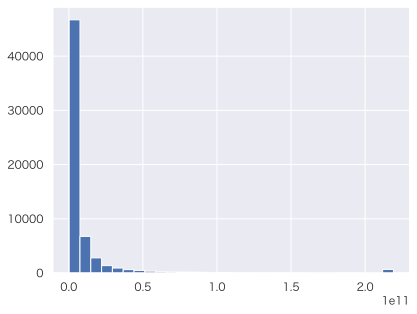

In [152]:
df_clean['总资产'].hist(bins = 30);

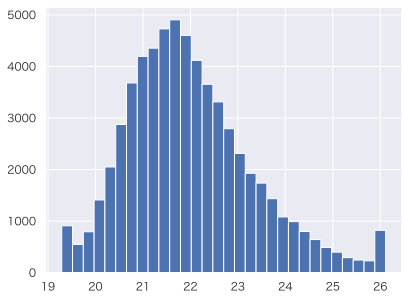

In [153]:
# 
df_clean['ln_总资产'].hist(bins = 30);

## 基准回归

现在我们要尝试做以下回归

投资强度 ~ 现金流强度 + 杠杆率 + 规模


In [154]:
reg_cols_basic = ['股票代码', '会计年度', '投资强度', '现金流强度', '杠杆率', 'ln_总资产']
df_reg_basic = df_clean[reg_cols_basic].dropna()
df_reg_basic.head()

,股票代码,会计年度,投资强度,现金流强度,杠杆率,ln_总资产
16,000001,2009,0.002077,0.011430,0.965177,26.112864
36,000002,1998,0.018404,0.059707,0.479479,22.119010
37,000002,1999,0.019791,0.067200,0.522476,22.226157
38,000002,2000,0.014025,0.073003,0.472516,22.449997
39,000002,2001,0.005365,0.099183,0.517797,22.592436


In [155]:
# 投资强度 ~ 现金流强度 + 杠杆率 + 规模

import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS

# ========= 1. 设置面板索引 =========
# 确保是 MultiIndex: (股票代码, 会计年度)
df_reg_basic = df_reg_basic.set_index(['股票代码', '会计年度']).sort_index()
df_reg_basic.tail()

投资强度     现金流强度       杠杆率     ln_总资产
股票代码   会计年度                                         
920982 2024  0.108469  0.335282  0.255276  21.444064
920985 2023  0.087440  0.062198  0.644271  22.044792
       2024  0.182422  0.074091  0.735773  22.413559
920992 2023  0.008882  0.035811  0.179175  20.412416
       2024  0.006383  0.043381  0.179176  20.429266

In [156]:
# ========= 2. 准备被解释变量和解释变量 =========
y = df_reg_basic['投资强度']

# 单变量：只用 现金流强度
X_single = df_reg_basic[['现金流强度']]

# 基础回归：现金流强度 + 杠杆率 + 规模
X_basic = df_reg_basic[['现金流强度', '杠杆率', 'ln_总资产']]

# PanelOLS 不会自动加截距，我们用 statsmodels.add_constant
X_single = sm.add_constant(X_single)
X_basic  = sm.add_constant(X_basic)

# =========  单变量回归（无固定效应） =========
mod_single = PanelOLS(
    dependent=y,
    exog=X_single,
    entity_effects=False,
    time_effects=False
)
res_single = mod_single.fit()
res_single.summary

Dep. Variable:,投资强度,R-squared:,0.1078
Estimator:,PanelOLS,R-squared (Between):,0.0870
No. Observations:,62326,R-squared (Within):,0.0823
Date:,"Wed, Dec 10 2025",R-squared (Overall):,0.1078
Time:,15:40:37,Log-likelihood,8.403e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,7531.9
Entities:,5511,P-value,0.0000
Avg Obs:,11.309,Distribution:,"F(1,62324)"
Min Obs:,1.0000,,
Max Obs:,27.000,F-statistic (robust):,7531.9


In [157]:
# ========= 单变量回归（有固定效应） =========
mod_single_fe = PanelOLS(
    dependent=y,
    exog=X_single,
    entity_effects=True,
    time_effects=True
)
reg_single_fe = mod_single_fe.fit(cov_type='clustered', cluster_entity=True)
reg_single_fe.summary

Dep. Variable:,投资强度,R-squared:,0.0666
Estimator:,PanelOLS,R-squared (Between):,0.0817
No. Observations:,62326,R-squared (Within):,0.0825
Date:,"Wed, Dec 10 2025",R-squared (Overall):,0.1026
Time:,15:40:37,Log-likelihood,9.731e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,4052.2
Entities:,5511,P-value,0.0000
Avg Obs:,11.309,Distribution:,"F(1,56788)"
Min Obs:,1.0000,,
Max Obs:,27.000,F-statistic (robust):,1138.5


In [158]:
# ========= 基础回归（公司 + 年份固定效应） =========
mod_basic_fe = PanelOLS(
    dependent=y,
    exog=X_basic,
    entity_effects=True,   # 公司固定效应
    time_effects=True      # 年份固定效应
)
res_basic_fe = mod_basic_fe.fit(cov_type='clustered', cluster_entity=True)
res_basic_fe.summary


Dep. Variable:,投资强度,R-squared:,0.0717
Estimator:,PanelOLS,R-squared (Between):,0.0767
No. Observations:,62326,R-squared (Within):,0.0537
Date:,"Wed, Dec 10 2025",R-squared (Overall):,0.0867
Time:,15:40:38,Log-likelihood,9.748e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,1462.0
Entities:,5511,P-value,0.0000
Avg Obs:,11.309,Distribution:,"F(3,56786)"
Min Obs:,1.0000,,
Max Obs:,27.000,F-statistic (robust):,389.73


In [159]:
from linearmodels.panel.results import compare

compare(results = {'(1)':res_single,"(2)":reg_single_fe, '(3)':res_basic_fe},stars=True)

,(1),(2),(3)
Dep. Variable,投资强度,投资强度,投资强度
Estimator,PanelOLS,PanelOLS,PanelOLS
No. Observations,62326,62326,62326
Cov. Est.,Unadjusted,Clustered,Clustered
R-squared,0.1078,0.0666,0.0717
R-Squared (Within),0.0823,0.0825,0.0537
R-Squared (Between),0.0870,0.0817,0.0767
R-Squared (Overall),0.1078,0.1026,0.0867
F-statistic,7531.9,4052.2,1462.0
P-value (F-stat),0.0000,0.0000,0.0000
